## Problem 1 ##
It is often the case that the frictional force on an object will increase as the object moves faster. A fortunate example of this is the parachutist; the role of the parachute is to produce a frictional force due to air drag, which is larger than would normally be the case without the parachute. Consider a very simple example in which the frictional force depends on the velocity. Assume the object velocity obeys an equation of the form $$\frac{dv}{dt}= a - bv $$ where a and b are constants. Think of as coming from a force applied such a gravity and b from friction or drag $(b > 0)$. Solve this equation exactly and using the euler method and compare both solutions. A possible choice: $a=10$, $b=1$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#Calculate v(t) for given time
def v(vo,a,b,t):
    return (-1/b)*((vo*np.exp(-b*t))-a)

#Calculate dv/dt
def dv(a,b,v):
    return (a - b*v)

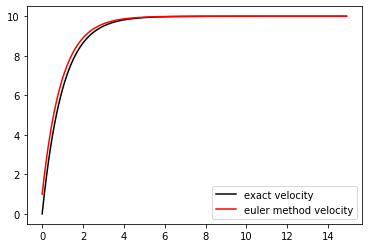

In [6]:
#Initial Velocity is 10
vo = 10

#Constant Values
a = 10
b = 1

#Time scale
tmin = 0
tmax = 15
dt = 0.1

time = np.arange(tmin,tmax,dt)

#exact velocity at any time t
vexact = v(vo,a,b,time)
plt.plot(time, vexact, label='exact velocity', color = "black")

#euler method for velocity at any time t
veuler = np.zeros(time.size)
veuler[0] = vo

for i in np.arange(time.size):
    veuler[i] = veuler[i-1] + dv(a,b,veuler[i-1])*dt
    
plt.plot(time,veuler, label='euler method velocity', color = "red")
plt.legend(loc='lower right')

## Problem 2 ##
Population growth problems after give rise to equations that are first order, for example $$\frac{dN}{dt}=aN - bN^2$$ might describe how the number of individuals in a population N changes with time. The term $aN$ corresponds to birth of new members, while the second term $-bN^2$ corresponds to death. This would model a system in which food will be harder to find when the population $N$ becomes large. 
* Solve this equation for $b = 0$ using the euler method and compare with the analytical solution
* Solve for nonzero values of b and give an explanation of your results. Some values to start with, $N(0) = 1000$, $a=10$, $b=0.01$
* Extra: Solve this equation using an sthochastics method

In [53]:
import numpy as np
import matplotlib.pyplot as plt

#Calculate N(t) for given time with b = 0
def N(NO,a,t):
    return NO*np.exp(a*t)

#Calculate N(t) for given time with b = 0.01
def N1(NO,a,b,t):
    return ((1.01*a*np.exp(a*t))/(1+1.01*b*np.exp(a*t)))

def dN(a,b,N):
    return ((a*N) - (b*(N**2)))

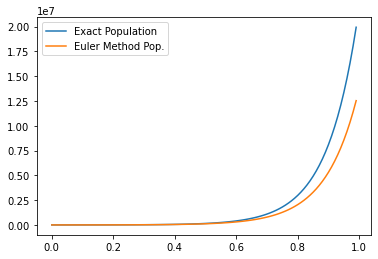

In [54]:
#Initial Population
NO = 1000

#Birth and Death Rates
a = 10
b = 0

#Time scale
tmin = 0
tmax = 1
dt = 0.01

time = np.arange(tmin,tmax,dt)

#exact population at any time t with b = 0
Nexact = N(NO,a,time)
plt.figure(1)
plt.plot(time, Nexact,label='Exact Population')

#euler method for population at any time t with b = 0
Neuler = np.zeros(time.size)
Neuler[0] = NO

for i in np.arange(time.size-1):
    Neuler[i+1] = Neuler[i] + dN(a,b,Neuler[i])*dt
    
plt.plot(time, Neuler,label='Euler Method Pop.')
plt.legend(loc='upper left')

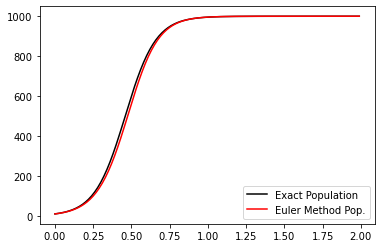

In [55]:
#Initial Population
NO = 10

#Birth and Death Rates
a = 10
b = 0.01

#Time scale
tmin = 0
tmax = 2
dt = 0.01

time = np.arange(tmin,tmax,dt)

#exact population at any time t with b = 0.01
N1exact = N1(NO,a,b,time)

plt.figure(2)
plt.plot(time,N1exact, color="black", label='Exact Population')

#euler method for population at any time t with b = 0.01
N1euler = np.zeros(time.size)
N1euler[0] = NO

for i in np.arange(time.size-1):
    N1euler[i+1] = N1euler[i] + dN(a,b,N1euler[i])*dt
    
plt.plot(time, N1euler, color="red", label='Euler Method Pop.')
plt.legend(loc='lower right')

## Problem 3 ##
Caluclate the expansion to second order using Taylor' Series of $sin(x)$, $cos(x)$, $(1-x)^n$ and compare values of the actual function with your approximation by plotting both in the same graph

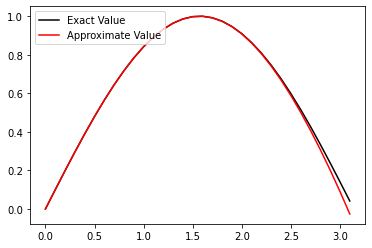

In [79]:
def sin_approx(x):
    return x-(x**3/6)+(x**5/120)-(x**7/5040)

x = np.arange(0,np.pi, 0.1)

plt.plot(x, np.sin(x), label='Exact Value', color="black")
plt.plot(x,sin_approx(x), label='Approximate Value', color="red")
plt.legend(loc='upper left')

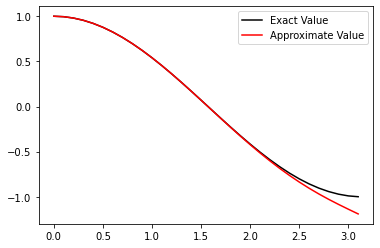

In [80]:
def cos_approx(x):
    return 1 - (x**2/2) + (x**4/24) - (x**6/720)

x = np.arange(0,np.pi,0.1)

plt.plot(x,np.cos(x), label='Exact Value', color="black")
plt.plot(x,cos_approx(x), label='Approximate Value', color="red")
plt.legend(loc='upper right')

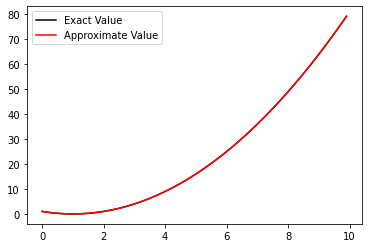

In [120]:
def x_approx(x,n):
    return 1 - n*x + (((n*(n-1))/2)*x**2)

n = 2
x = np.arange(0,10,0.1)

plt.plot(x,(1-x)**n, label='Exact Value', color="black")
plt.plot(x,x_approx(x,n), label='Approximate Value', color = "red")
plt.legend(loc='upper left')